# Tutoriel 8

[Télécharger l'exercice](../08_exercice.zip)

# Construire des matrices 2D avec `np.meshgrid`

**Objectif** : Apprendre à créer et manipuler facilement des matrices 2D pour représenter des champs physiques (température, altitude, distance, etc.).

**Pourquoi c'est important ?** Dans vos modèles numériques 2D, vous devez souvent :
- Initialiser des champs de variables (température, pression, etc.)
- Calculer des distances ou des fonctions de position
- Appliquer des conditions aux frontières ou dans des zones spécifiques

`np.meshgrid` vous permet de faire tout cela **sans boucles** ! 🚀

## 1. Import et création des vecteurs de base

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Créons d'abord les vecteurs de coordonnées
x = np.linspace(0, 10, 33)  # 33 points de x=0 à x=10
y = np.linspace(0, 3, 25)    # 25 points de y=0 à y=3

print("Vecteur x :")
print(x)
print("\nVecteur y :")
print(y)
print(f"\nTaille : nx = {len(x)}, ny = {len(y)}")

Vecteur x :
[ 0.      0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.5
  2.8125  3.125   3.4375  3.75    4.0625  4.375   4.6875  5.      5.3125
  5.625   5.9375  6.25    6.5625  6.875   7.1875  7.5     7.8125  8.125
  8.4375  8.75    9.0625  9.375   9.6875 10.    ]

Vecteur y :
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.125 1.25  1.375
 1.5   1.625 1.75  1.875 2.    2.125 2.25  2.375 2.5   2.625 2.75  2.875
 3.   ]

Taille : nx = 33, ny = 25


## 2. Création des matrices 2D avec `meshgrid`

**La question** : Comment transformer ces deux vecteurs 1D (`x` et `y`) en matrices 2D ?

**La réponse** : `np.meshgrid(x, y)` crée deux matrices `X` et `Y` de taille `(ny, nx)` où :
- `X[j, i]` contient la coordonnée **x** du point de grille `(i, j)`
- `Y[j, i]` contient la coordonnée **y** du point de grille `(i, j)`

👉 **Autrement dit** : Les valeurs de `X` et `Y` à la position `[j, i]` vous donnent les coordonnées spatiales réelles de ce point !

In [21]:
# Création des matrices 2D avec grille
X, Y = np.meshgrid(x, y)

print("Matrice X (coordonnées x répétées sur les lignes) :")
print(X)
print("\nMatrice Y (coordonnées y répétées sur les colonnes) :")
print(Y)
print(f"\nTaille des matrices : {X.shape} (ny={Y.shape[0]}, nx={X.shape[1]})")

Matrice X (coordonnées x répétées sur les lignes) :
[[ 0.      0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.5
   2.8125  3.125   3.4375  3.75    4.0625  4.375   4.6875  5.      5.3125
   5.625   5.9375  6.25    6.5625  6.875   7.1875  7.5     7.8125  8.125
   8.4375  8.75    9.0625  9.375   9.6875 10.    ]
 [ 0.      0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.5
   2.8125  3.125   3.4375  3.75    4.0625  4.375   4.6875  5.      5.3125
   5.625   5.9375  6.25    6.5625  6.875   7.1875  7.5     7.8125  8.125
   8.4375  8.75    9.0625  9.375   9.6875 10.    ]
 [ 0.      0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.5
   2.8125  3.125   3.4375  3.75    4.0625  4.375   4.6875  5.      5.3125
   5.625   5.9375  6.25    6.5625  6.875   7.1875  7.5     7.8125  8.125
   8.4375  8.75    9.0625  9.375   9.6875 10.    ]
 [ 0.      0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.5
   2.8125  3.125   3.4375  3.75    4.0625  4.375   4.6875  5.      5.3

## 3. Visualisation des matrices X et Y

Pour mieux comprendre, visualisons ces matrices :

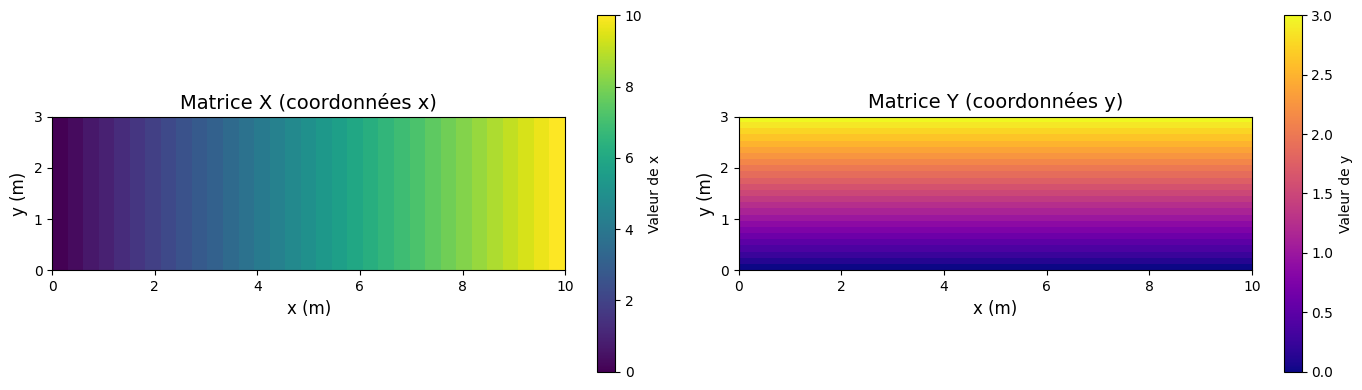

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Affichage de X
im1 = ax1.imshow(X, extent=[0, 10, 0, 3], origin='lower', cmap='viridis')
ax1.set_title("Matrice X (coordonnées x)", fontsize=14)
ax1.set_xlabel("x (m)", fontsize=12)
ax1.set_ylabel("y (m)", fontsize=12)
plt.colorbar(im1, ax=ax1, label="Valeur de x")

# Affichage de Y
im2 = ax2.imshow(Y, extent=[0, 10, 0, 3], origin='lower', cmap='plasma')
ax2.set_title("Matrice Y (coordonnées y)", fontsize=14)
ax2.set_xlabel("x (m)", fontsize=12)
ax2.set_ylabel("y (m)", fontsize=12)
plt.colorbar(im2, ax=ax2, label="Valeur de y")

plt.tight_layout()
plt.show()

## 4. Application : Calcul d'une fonction 2D (distance au centre)

Maintenant que nous avons `X` et `Y`, nous pouvons calculer **n'importe quelle fonction de (x, y)** très facilement !

**Exemple** : Calculons la distance au carré par rapport au point central `(x₀, y₀) = (5, 2)` :

$$d^2 = (x - x_0)^2 + (y - y_0)^2$$

Matrice des distances au carré :
[[2.90000000e+01 2.59726562e+01 2.31406250e+01 2.05039062e+01
  1.80625000e+01 1.58164062e+01 1.37656250e+01 1.19101562e+01
  1.02500000e+01 8.78515625e+00 7.51562500e+00 6.44140625e+00
  5.56250000e+00 4.87890625e+00 4.39062500e+00 4.09765625e+00
  4.00000000e+00 4.09765625e+00 4.39062500e+00 4.87890625e+00
  5.56250000e+00 6.44140625e+00 7.51562500e+00 8.78515625e+00
  1.02500000e+01 1.19101562e+01 1.37656250e+01 1.58164062e+01
  1.80625000e+01 2.05039062e+01 2.31406250e+01 2.59726562e+01
  2.90000000e+01]
 [2.85156250e+01 2.54882812e+01 2.26562500e+01 2.00195312e+01
  1.75781250e+01 1.53320312e+01 1.32812500e+01 1.14257812e+01
  9.76562500e+00 8.30078125e+00 7.03125000e+00 5.95703125e+00
  5.07812500e+00 4.39453125e+00 3.90625000e+00 3.61328125e+00
  3.51562500e+00 3.61328125e+00 3.90625000e+00 4.39453125e+00
  5.07812500e+00 5.95703125e+00 7.03125000e+00 8.30078125e+00
  9.76562500e+00 1.14257812e+01 1.32812500e+01 1.53320312e+01
  1.75781250e+01 2.

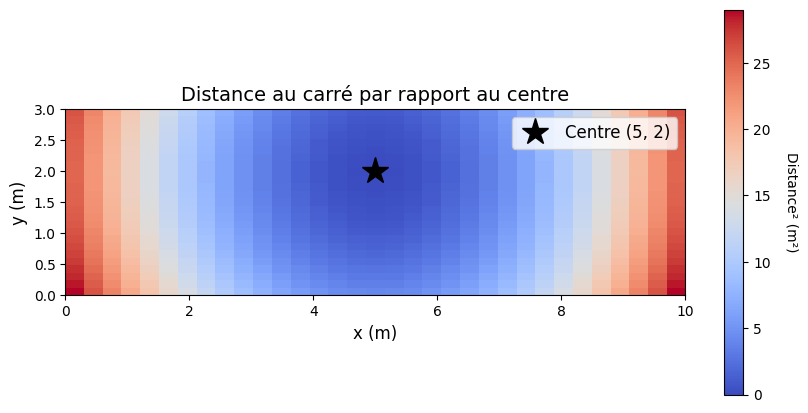

In [23]:
# Point central
x0, y0 = 5, 2

# Calcul de la distance au carré (sans boucles !)
dist2 = (X - x0)**2 + (Y - y0)**2

print("Matrice des distances au carré :")
print(dist2)

# Visualisation
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(dist2, extent=[0, 10, 0, 3], origin='lower', cmap='coolwarm')
ax.plot(x0, y0, 'k*', markersize=20, label=f'Centre ({x0}, {y0})')
ax.set_title("Distance au carré par rapport au centre", fontsize=14)
ax.set_xlabel("x (m)", fontsize=12)
ax.set_ylabel("y (m)", fontsize=12)
ax.legend(fontsize=12)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Distance² (m²)", rotation=270, labelpad=20)
plt.show()

## 5. Application : Sélectionner une zone carrée

**Problème pratique** : Je veux identifier tous les points situés à moins de 1 mètre du centre `(5, 2)`.

**Solution** : On définit une distance qui prend le **maximum des écarts** en x et en y :

$$d = \max(|x - x_0|, |y - y_0|)$$

Cette distance forme naturellement un **carré** autour du point central.

Distance d (max des écarts) :
[[5.     4.6875 4.375  4.0625 3.75   3.4375 3.125  2.8125 2.5    2.1875
  2.     2.     2.     2.     2.     2.     2.     2.     2.     2.
  2.     2.     2.     2.1875 2.5    2.8125 3.125  3.4375 3.75   4.0625
  4.375  4.6875 5.    ]
 [5.     4.6875 4.375  4.0625 3.75   3.4375 3.125  2.8125 2.5    2.1875
  1.875  1.875  1.875  1.875  1.875  1.875  1.875  1.875  1.875  1.875
  1.875  1.875  1.875  2.1875 2.5    2.8125 3.125  3.4375 3.75   4.0625
  4.375  4.6875 5.    ]
 [5.     4.6875 4.375  4.0625 3.75   3.4375 3.125  2.8125 2.5    2.1875
  1.875  1.75   1.75   1.75   1.75   1.75   1.75   1.75   1.75   1.75
  1.75   1.75   1.875  2.1875 2.5    2.8125 3.125  3.4375 3.75   4.0625
  4.375  4.6875 5.    ]
 [5.     4.6875 4.375  4.0625 3.75   3.4375 3.125  2.8125 2.5    2.1875
  1.875  1.625  1.625  1.625  1.625  1.625  1.625  1.625  1.625  1.625
  1.625  1.625  1.875  2.1875 2.5    2.8125 3.125  3.4375 3.75   4.0625
  4.375  4.6875 5.    ]
 [5.     4.6875 4.

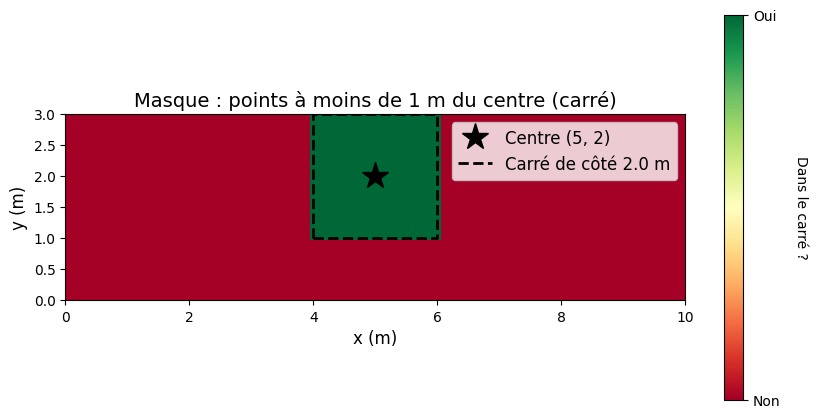


✅ Nombre de points dans le carré : 119


In [24]:
# Point central et taille de la zone
x0, y0 = 5, 2
seuil = 1.0

# Calcul de la distance (maximum des écarts en x et y)
d = np.maximum(np.abs(X - x0), np.abs(Y - y0))

# Création du masque pour les points dans le carré
masque_carre = d <= seuil

print("Distance d (max des écarts) :")
print(d)
print("\nMasque carré (1 = dans le carré, 0 = hors du carré) :")
print(masque_carre.astype(int))

# Visualisation
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(masque_carre, extent=[0, 10, 0, 3], origin='lower', cmap='RdYlGn', vmin=0, vmax=1)
ax.plot(x0, y0, 'k*', markersize=20, label=f'Centre ({x0}, {y0})')

# Dessiner le carré théorique
carre_x = [x0-seuil, x0+seuil, x0+seuil, x0-seuil, x0-seuil]
carre_y = [y0-seuil, y0-seuil, y0+seuil, y0+seuil, y0-seuil]
ax.plot(carre_x, carre_y, 'k--', linewidth=2, label=f'Carré de côté {2*seuil} m')

ax.set_title("Masque : points à moins de 1 m du centre (carré)", fontsize=14)
ax.set_xlabel("x (m)", fontsize=12)
ax.set_ylabel("y (m)", fontsize=12)
ax.set_aspect('equal')
ax.legend(fontsize=12)
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1])
cbar.set_label("Dans le carré ?", rotation=270, labelpad=20)
cbar.ax.set_yticklabels(['Non', 'Oui'])
plt.show()

print(f"\n✅ Nombre de points dans le carré : {masque_carre.sum()}")

## 6. Application : Initialiser une pollution ou température localisée

**Cas d'usage réel** : Modéliser une pollution ou une source de chaleur localisée.

**Exemple avec zone carrée** (plus simple à définir) :
- Concentration de base `C = 0` partout
- Concentration `C = 1` dans un carré de côté 2 m autour du point `(5, 2)`

👉 **Avantage du carré** : Plus simple que le cercle, souvent suffisant pour les conditions initiales !

In [ ]:
# === EXEMPLE : Pollution localisée (zone carrée) ===

# Initialisation : concentration nulle partout
C = np.zeros((ny, nx))

# Calcul de la distance de Chebyshev au centre (5, 2)
d = np.maximum(np.abs(X - 5), np.abs(Y - 2))

# Zone polluée : carré de côté 2 (donc distance ≤ 1)
C[d <= 1] = 1

print("Distance de Chebyshev d :")
print(d)
print("\nConcentration C (0 = propre, 1 = pollué) :")
print(C)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Graphique 1 : Distance
im1 = ax1.imshow(d, extent=[0, 10, 0, 3], origin='lower', cmap='viridis')
ax1.plot(5, 2, 'r*', markersize=20, label='Centre (5, 2)')
carre_x = [5-1, 5+1, 5+1, 5-1, 5-1]
carre_y = [2-1, 2-1, 2+1, 2+1, 2-1]
ax1.plot(carre_x, carre_y, 'r--', linewidth=2, label='Zone d ≤ 1')
ax1.set_title("Distance de Chebyshev au centre", fontsize=14, fontweight='bold')
ax1.set_xlabel("x (m)", fontsize=12)
ax1.set_ylabel("y (m)", fontsize=12)
ax1.legend(fontsize=11)
ax1.set_aspect('equal')
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label("Distance (m)", rotation=270, labelpad=20)

# Graphique 2 : Concentration
im2 = ax2.imshow(C, extent=[0, 10, 0, 3], origin='lower', cmap='RdYlGn_r', vmin=0, vmax=1)
ax2.plot(5, 2, 'k*', markersize=20, label='Source de pollution')
ax2.plot(carre_x, carre_y, 'k--', linewidth=2, label='Zone polluée')
ax2.set_title("Concentration de pollution", fontsize=14, fontweight='bold')
ax2.set_xlabel("x (m)", fontsize=12)
ax2.set_ylabel("y (m)", fontsize=12)
ax2.legend(fontsize=11)
ax2.set_aspect('equal')
cbar2 = plt.colorbar(im2, ax=ax2, ticks=[0, 1])
cbar2.set_label("Concentration", rotation=270, labelpad=20)
cbar2.ax.set_yticklabels(['Propre', 'Pollué'])

plt.tight_layout()
plt.show()

print(f"\n✅ Nombre de cellules polluées : {C.sum():.0f} sur {nx*ny}")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 25

## 7. Exemples d'autres fonctions 2D utiles

Avec `X` et `Y`, vous pouvez créer n'importe quelle fonction mathématique :

In [ ]:
# Créer une grille plus fine pour de belles visualisations
x_fin = np.linspace(0, 10, 100)
y_fin = np.linspace(0, 3, 50)
X_fin, Y_fin = np.meshgrid(x_fin, y_fin)

# Différentes fonctions 2D
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

# 1. Onde sinusoïdale
Z1 = np.sin(2*np.pi*X_fin/10) * np.cos(2*np.pi*Y_fin/3)
axes[0].imshow(Z1, extent=[0, 10, 0, 3], origin='lower', cmap='seismic')
axes[0].set_title("sin(2πx/10) × cos(2πy/3)")
axes[0].set_xlabel("x (m)")
axes[0].set_ylabel("y (m)")

# 2. Gaussienne 2D
Z2 = np.exp(-((X_fin-5)**2 + (Y_fin-1.5)**2) / 2)
axes[1].imshow(Z2, extent=[0, 10, 0, 3], origin='lower', cmap='viridis')
axes[1].set_title("Gaussienne centrée")
axes[1].set_xlabel("x (m)")
axes[1].set_ylabel("y (m)")

# 3. Pente linéaire
Z3 = 0.5*X_fin + 2*Y_fin
axes[2].imshow(Z3, extent=[0, 10, 0, 3], origin='lower', cmap='terrain')
axes[2].set_title("Pente : 0.5x + 2y")
axes[2].set_xlabel("x (m)")
axes[2].set_ylabel("y (m)")
 
plt.tight_layout()
plt.show()

## 8. Alternative : Zone circulaire au lieu d'un carré

Dans les sections précédentes, nous avons utilisé la distance définie par $d = \max(|x - x_0|, |y - y_0|)$ qui crée un **carré**.

**On aurait aussi pu utiliser la distance euclidienne classique** :

$$d = \sqrt{(x - x_0)^2 + (y - y_0)^2}$$

Cette distance crée un **disque** (cercle) au lieu d'un carré.

### Comparaison des deux méthodes :

/tmp/ipykernel_1809717/998529463.py:43: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1809717/998529463.py:43: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()


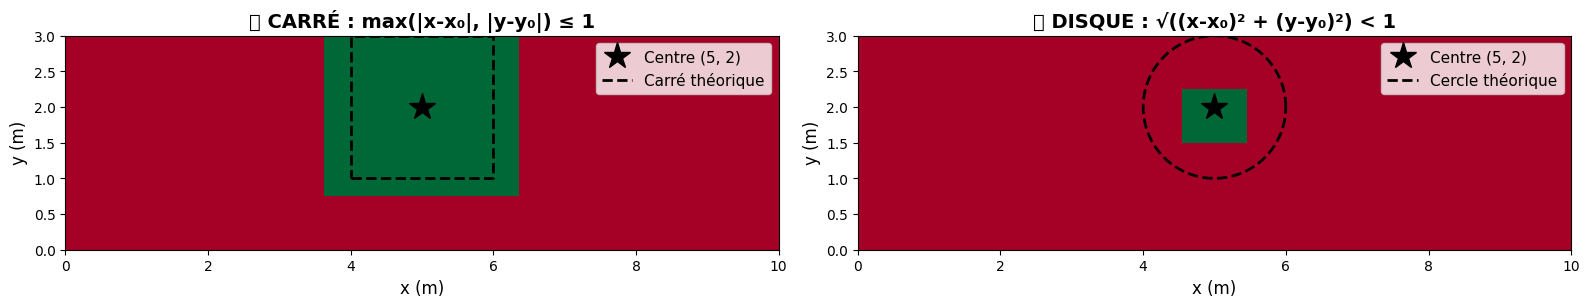

Points dans le carré : 9
Points dans le disque : 1


In [ ]:
# Comparaison : CARRÉ vs DISQUE

# Point central
x0, y0 = 5, 2
rayon = 1.0

# === MÉTHODE 1 : CARRÉ (celle utilisée avant) ===
d_carre = np.maximum(np.abs(X - x0), np.abs(Y - y0))
masque_carre = d_carre <= rayon

# === MÉTHODE 2 : DISQUE (alternative) ===
d_disque = np.sqrt((X - x0)**2 + (Y - y0)**2)
masque_disque = d_disque < rayon

# Visualisation côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Angle pour dessiner les formes théoriques
theta = np.linspace(0, 2*np.pi, 100)

# Graphique 1 : CARRÉ
im1 = ax1.imshow(masque_carre, extent=[0, 10, 0, 3], origin='lower', cmap='RdYlGn', vmin=0, vmax=1)
ax1.plot(x0, y0, 'k*', markersize=20, label=f'Centre ({x0}, {y0})')
carre_x = [x0-rayon, x0+rayon, x0+rayon, x0-rayon, x0-rayon]
carre_y = [y0-rayon, y0-rayon, y0+rayon, y0+rayon, y0-rayon]
ax1.plot(carre_x, carre_y, 'k--', linewidth=2, label='Carré théorique')
ax1.set_title("🟦 CARRÉ : max(|x-x₀|, |y-y₀|) ≤ 1", fontsize=14, fontweight='bold')
ax1.set_xlabel("x (m)", fontsize=12)
ax1.set_ylabel("y (m)", fontsize=12)
ax1.legend(fontsize=11)
ax1.set_aspect('equal')

# Graphique 2 : DISQUE
im2 = ax2.imshow(masque_disque, extent=[0, 10, 0, 3], origin='lower', cmap='RdYlGn', vmin=0, vmax=1)
ax2.plot(x0, y0, 'k*', markersize=20, label=f'Centre ({x0}, {y0})')
ax2.plot(x0 + rayon*np.cos(theta), y0 + rayon*np.sin(theta), 'k--', linewidth=2, label='Cercle théorique')
ax2.set_title("🔵 DISQUE : √((x-x₀)² + (y-y₀)²) < 1", fontsize=14, fontweight='bold')
ax2.set_xlabel("x (m)", fontsize=12)
ax2.set_ylabel("y (m)", fontsize=12)
ax2.legend(fontsize=11)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

print(f"Points dans le carré : {masque_carre.sum()}")
print(f"Points dans le disque : {masque_disque.sum()}")